<a href="https://colab.research.google.com/github/GustavoPastorelli/Python-para-iniciantes/blob/main/codigo_IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Raspagem e estatistica**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Função para realizar o WebScraping
def scrap_state_info(state: str) -> dict:
    """
    Retorna informações do estado brasileiro

    :param state: nome do estado
    :returns state_dict: dicionário com indicadores do estado
    """
    print(f'Picking {state} info...')
    state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
    page = requests.get(state_url)

    soup = BeautifulSoup(page.content, 'html.parser')
    indicadors = soup.select('.indicador')

    state_dict = {
        ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
        for ind in indicadors
    }

    state_dict['Estado'] = state

    return state_dict

scrap_state_info('sp')

Picking sp info...


{'Governador': 'RODRIGO GARCIA\xa0\xa0\xa0[2019]',
 'Capital': 'São Paulo\xa0\xa0\xa0[2010]',
 'Gentílico': 'paulista',
 'Área Territorial': '248.219,485 km²\xa0\xa0\xa0[2021]',
 'População estimada': '46.649.132 pessoas\xa0\xa0\xa0[2021]',
 'Densidade demográfica': '166,25 hab/km²\xa0\xa0\xa0[2010]',
 'Matrículas no ensino fundamental': '5.396.803 matrículas\xa0\xa0\xa0[2021]',
 'IDH Índice de desenvolvimento humano': '0,783\xa0\xa0\xa0[2010]',
 'Receitas realizadas': '232.822.496,57 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Despesas empenhadas': '231.982.243,69 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Rendimento mensal domiciliar per capita': '1.836 R$\xa0\xa0\xa0[2021]',
 'Total de veículos': '31.455.473 veículos\xa0\xa0\xa0[2021]',
 'Estado': 'sp'}

In [ ]:
#PEGA TODOS ESTADOS
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

states_data = [scrap_state_info(state) for state in states]

Picking AC info...
Picking AL info...
Picking AP info...
Picking AM info...
Picking BA info...
Picking CE info...
Picking DF info...
Picking ES info...
Picking GO info...
Picking MA info...
Picking MT info...
Picking MS info...
Picking MG info...
Picking PA info...
Picking PB info...
Picking PR info...
Picking PE info...
Picking PI info...
Picking RJ info...
Picking RN info...
Picking RS info...
Picking RO info...
Picking RR info...
Picking SC info...
Picking SP info...
Picking SE info...
Picking TO info...


In [ ]:
#DADO BRUTO
df = pd.DataFrame(states_data)
df.head()
# df.info()

,Governador,Capital,Gentílico,Área Territorial,População estimada,Densidade demográfica,Matrículas no ensino fundamental,IDH Índice de desenvolvimento humano,Receitas realizadas,Despesas empenhadas,Rendimento mensal domiciliar per capita,Total de veículos,Estado
0,GLADSON DE LIMA CAMELI [2019],Rio Branco [2010],acriano,"164.173,431 km² [2021]",906.876 pessoas [2021],"4,47 hab/km² [2010]",153.015 matrículas [2021],"0,663 [2010]","6.632.883,11 R$ (×1000) [2017]","6.084.416,81 R$ (×1000) [2017]",888 R$ [2021],320.173 veículos [2021],AC
1,JOSE RENAN VASCONCELOS CALHEIROS FILHO [2019],Maceió [2010],alagoano,"27.830,661 km² [2021]",3.365.351 pessoas [2021],"112,33 hab/km² [2010]",458.782 matrículas [2021],"0,631 [2010]","11.950.438,46 R$ (×1000) [2017]","10.460.634,92 R$ (×1000) [2017]",777 R$ [2021],981.823 veículos [2021],AL
2,ANTONIO WALDEZ GÓES DA SILVA [2019],Macapá [2010],amapaense,"142.470,762 km² [2021]",877.613 pessoas [2021],"4,69 hab/km² [2010]",133.839 matrículas [2021],"0,708 [2010]","5.396.417,14 R$ (×1000) [2017]","4.224.464,09 R$ (×1000) [2017]",855 R$ [2021],224.208 veículos [2021],AP
3,WILSON MIRANDA LIMA [2019],Manaus [2010],amazonense,"1.559.167,878 km² [2021]",4.269.995 pessoas [2021],"2,23 hab/km² [2010]",702.763 matrículas [2021],"0,674 [2010]","17.328.459,43 R$ (×1000) [2017]","15.324.896,56 R$ (×1000) [2017]",800 R$ [2021],1.014.026 veículos [2021],AM
4,RUI COSTA DOS SANTOS [2019],Salvador [2010],baiano,"564.760,429 km² [2021]",14.985.284 pessoas [2021],"24,82 hab/km² [2010]",1.946.957 matrículas [2021],"0,660 [2010]","50.191.003,24 R$ (×1000) [2017]","45.570.160,00 R$ (×1000) [2017]",843 R$ [2021],4.695.972 veículos [2021],BA


In [ ]:
#LIMPA DADOS
states_df = df.copy()
states_df.columns = ['governor', 'capital', 'gentile', 'area', 'population', 'demographic_density', 'primary_school_enrollment', 'idh', 'realized_revenue', 'committed_expenses', 'income_per_capita', 'vehicle_total', 'code']
states_df = states_df[['code', 'governor', 'population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']]



states_df = states_df.replace({
    '\.': '',
    ',': '.',
    '\[\d+\]': '',
    ' hab/km²': '',
    ' km²': '',
    ' pessoas': '',
    ' matrículas': '',
    'R\$.*': '',
    ' veículos': ''
}, regex=True)


states_df.head()


num_cols = ['population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']


states_df[num_cols] = states_df[num_cols].apply(lambda x: x.str.strip())
# states_df[num_cols] = states_df[num_cols].apply(pd.to_numeric)
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   code                       27 non-null     object
 1   governor                   27 non-null     object
 2   population                 27 non-null     object
 3   area                       27 non-null     object
 4   idh                        27 non-null     object
 5   income_per_capita          27 non-null     object
 6   vehicle_total              27 non-null     object
 7   primary_school_enrollment  27 non-null     object
 8   committed_expenses         27 non-null     object
 9   realized_revenue           27 non-null     object
dtypes: object(10)
memory usage: 2.2+ KB


In [ ]:
#SALVA CSV
from google.colab import drive
#drive.mount('/content/drive')

#states_df.to_csv('/content/drive/MyDrive/ibge_states.csv')

In [ ]:
#GRAFICOS
states_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
0,AC,GLADSON DE LIMA CAMELI,906876,164173.431,0.663,888,320173,153015,6084416.81,6632883.11
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3365351,27830.661,0.631,777,981823,458782,10460634.92,11950438.46
2,AP,ANTONIO WALDEZ GÓES DA SILVA,877613,142470.762,0.708,855,224208,133839,4224464.09,5396417.14
3,AM,WILSON MIRANDA LIMA,4269995,1559167.878,0.674,800,1014026,702763,15324896.56,17328459.43
4,BA,RUI COSTA DOS SANTOS,14985284,564760.429,0.660,843,4695972,1946957,45570160.00,50191003.24


In [ ]:
populacao_estado = states_df[['code','governor','population']]
print(populacao_estado)

   code                                   governor population
0    AC                  GLADSON DE LIMA CAMELI        906876
1    AL  JOSE RENAN VASCONCELOS CALHEIROS FILHO       3365351
2    AP            ANTONIO WALDEZ GÓES DA SILVA        877613
3    AM                     WILSON MIRANDA LIMA       4269995
4    BA                    RUI COSTA DOS SANTOS      14985284
5    CE              CAMILO SOBREIRA DE SANTANA       9240580
6    DF             IBANEIS ROCHA BARROS JUNIOR       3094325
7    ES                  JOSE RENATO CASAGRANDE       4108508
8    GO                    RONALDO RAMOS CAIADO       7206589
9    MA           FLÁVIO DINO DE CASTRO E COSTA       7153262
10   MT                   MAURO MENDES FERREIRA       3567234
11   MS                 REINALDO AZAMBUJA SILVA       2839188
12   MG                         ROMEU ZEMA NETO      21411923
13   PA                 HELDER ZAHLUTH BARBALHO       8777124
14   PB                 JOÃO AZEVEDO LINS FILHO       4059905
15   PR 

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nome_das_suas_colunas = states_df['code']
valor_das_suas_colunas = states_df['population']
lista1 = [states_df['code'],states_df['population']]


In [ ]:
print(lista1)

[0     AC
1     AL
2     AP
3     AM
4     BA
5     CE
6     DF
7     ES
8     GO
9     MA
10    MT
11    MS
12    MG
13    PA
14    PB
15    PR
16    PE
17    PI
18    RJ
19    RN
20    RS
21    RO
22    RR
23    SC
24    SP
25    SE
26    TO
Name: code, dtype: object, 0       906876
1      3365351
2       877613
3      4269995
4     14985284
5      9240580
6      3094325
7      4108508
8      7206589
9      7153262
10     3567234
11     2839188
12    21411923
13     8777124
14     4059905
15    11597484
16     9674793
17     3289290
18    17463349
19     3560903
20    11466630
21     1815278
22      652713
23     7338473
24    46649132
25     2338474
26     1607363
Name: population, dtype: object]


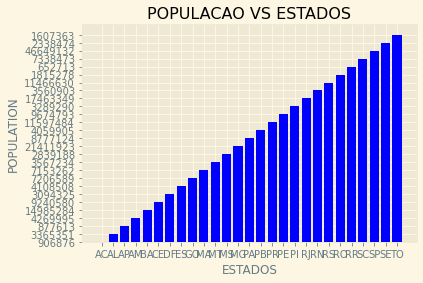

In [ ]:
#Estilo do tema
plt.style.use('Solarize_Light2')


# Barras na vertical
plt.bar(nome_das_suas_colunas,valor_das_suas_colunas , color = 'blue')


plt.ylabel("POPULATION")
plt.xlabel("ESTADOS")
plt.title("POPULACAO VS ESTADOS")
plt.show()

In [ ]:
populacao_estado = states_df[['code','governor','population']].groupby(['code','governor']).sum()#,sorted('population')
print(populacao_estado)

                                               population
code governor                                            
AC   GLADSON DE LIMA CAMELI                        906876
AL   JOSE RENAN VASCONCELOS CALHEIROS FILHO       3365351
AM   WILSON MIRANDA LIMA                          4269995
AP   ANTONIO WALDEZ GÓES DA SILVA                  877613
BA   RUI COSTA DOS SANTOS                        14985284
CE   CAMILO SOBREIRA DE SANTANA                   9240580
DF   IBANEIS ROCHA BARROS JUNIOR                  3094325
ES   JOSE RENATO CASAGRANDE                       4108508
GO   RONALDO RAMOS CAIADO                         7206589
MA   FLÁVIO DINO DE CASTRO E COSTA                7153262
MG   ROMEU ZEMA NETO                             21411923
MS   REINALDO AZAMBUJA SILVA                      2839188
MT   MAURO MENDES FERREIRA                        3567234
PA   HELDER ZAHLUTH BARBALHO                      8777124
PB   JOÃO AZEVEDO LINS FILHO                      4059905
PE   PAULO HEN

In [ ]:
populacao_estado.describe()

#junta todos os numeros
populacao_estado['population'].max()

'9674793'

# **PLN**

In [ ]:
!pip install wordcloud -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

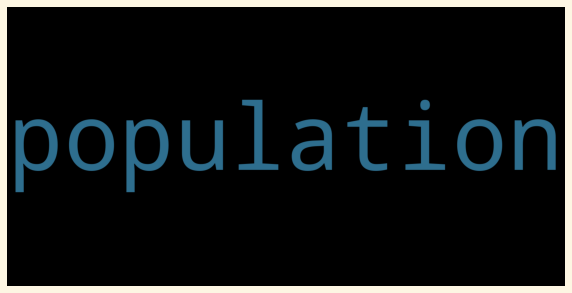

In [ ]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate('population')

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("populacao_estado.png")